In [1]:
# Set seeds for same reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
kaggle_credentails = json.load(open("kaggle.json"))

In [4]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:54<00:00, 36.3MB/s]
100% 2.04G/2.04G [00:54<00:00, 40.5MB/s]


In [6]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [19]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'color', 'grayscale']
38
['Strawberry___Leaf_scorch', 'Raspberry___healthy', 'Strawberry___healthy', 'Apple___Apple_scab', 'Tomato___Late_blight']
38
['Strawberry___Leaf_scorch', 'Raspberry___healthy', 'Strawberry___healthy', 'Apple___Apple_scab', 'Tomato___Late_blight']
38
['Strawberry___Leaf_scorch', 'Raspberry___healthy', 'Strawberry___healthy', 'Apple___Apple_scab', 'Tomato___Late_blight']


In [7]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


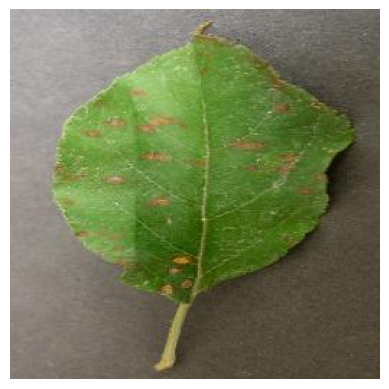

In [21]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [22]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [11]:
# Image Parameters
img_size = 224
batch_size = 32

In [12]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [13]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [14]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


### **Trainig the model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load pre-trained VGG19 without the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Build the custom model on top of VGG19
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes in your dataset
])


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust epochs based on your needs
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 769s 556ms/step - accuracy: 0.2597 - loss: 2.8886 - val_accuracy: 0.5554 - val_loss: 1.8488
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 805s 593ms/step - accuracy: 0.5817 - loss: 1.6865 - val_accuracy: 0.6492 - val_loss: 1.3106
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 745s 548ms/step - accuracy: 0.6717 - loss: 1.2438 - val_accuracy: 0.7116 - val_loss: 1.0648
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 752s 554ms/step - accuracy: 0.7184 - loss: 1.0349 - val_accuracy: 0.7435 - val_loss: 0.9237
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 748s 551ms/step - accuracy: 0.7452 - loss: 0.9108 - val_accuracy: 0.7640 - val_loss: 0.8261
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 755s 556ms/step - accuracy: 0.7691 - loss: 0.8171 - val_accuracy: 0.7874 - val_loss: 0.7562
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 749s 551ms/step - accuracy: 0.7860 - loss: 0.7546 - val_accuracy: 0.7995 - val_loss: 0.7034
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 745s 549ms/step - ac

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 150s 443ms/step - accuracy: 0.8240 - loss: 0.6064
Validation Accuracy: 81.96%


340/340 ━━━━━━━━━━━━━━━━━━━━ 150s 440ms/step - accuracy: 0.8151 - loss: 0.6092
Validation Loss: 0.6162320375442505, Validation Accuracy: 0.8170338273048401


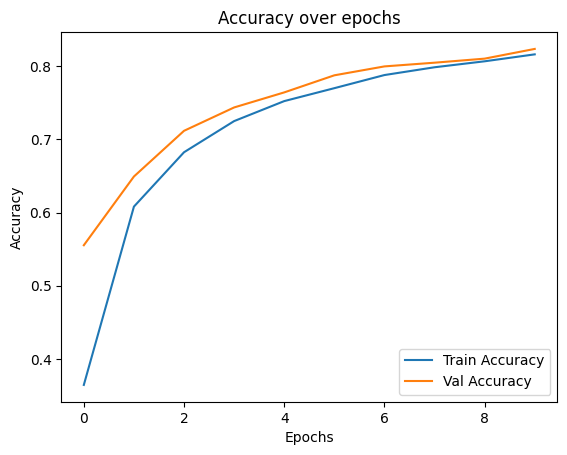

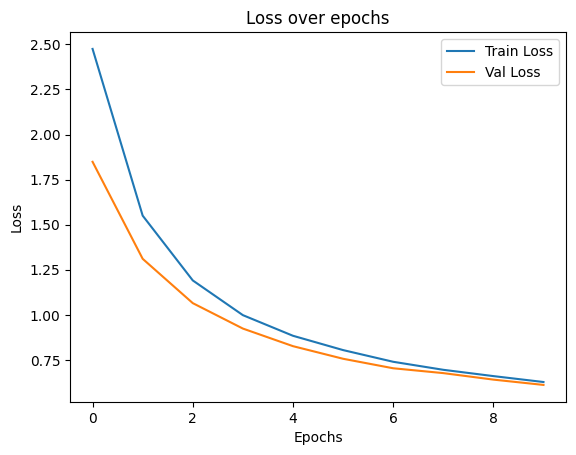

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
model.save('my_model_PDP.keras')

In [7]:
# Unfreeze the last few layers of the VGG19 base model
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("/content/my_model_PDP.keras")



In [8]:
# Recompile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [28]:
# Fine-tune the model
history_fine_tune = model.fit(
    train_generator,
    epochs=5,  # Adjust epochs as needed
    validation_data=validation_generator
)


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 766s 564ms/step - accuracy: 0.9130 - loss: 0.2662 - val_accuracy: 0.9123 - val_loss: 0.2671
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 767s 565ms/step - accuracy: 0.9274 - loss: 0.2234 - val_accuracy: 0.9347 - val_loss: 0.2033
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 768s 566ms/step - accuracy: 0.9388 - loss: 0.1857 - val_accuracy: 0.9414 - val_loss: 0.1797
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 764s 563ms/step - accuracy: 0.9456 - loss: 0.1604 - val_accuracy: 0.9418 - val_loss: 0.1786
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 815s 600ms/step - accuracy: 0.9485 - loss: 0.1488 - val_accuracy: 0.9523 - val_loss: 0.1493


In [29]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Fine-tuning - Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


340/340 ━━━━━━━━━━━━━━━━━━━━ 153s 450ms/step - accuracy: 0.9526 - loss: 0.1428
Fine-tuning - Validation Loss: 0.14921344816684723, Validation Accuracy: 0.9528067111968994


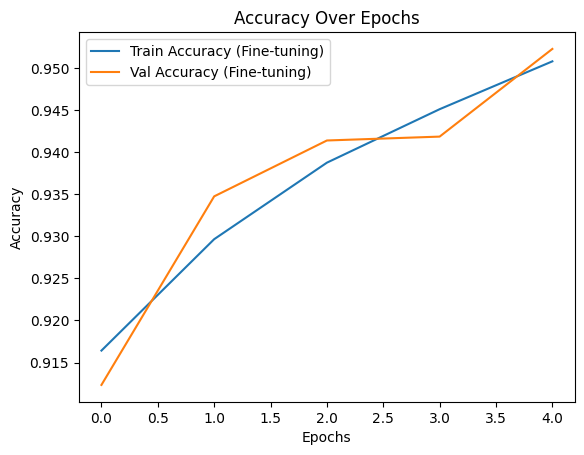

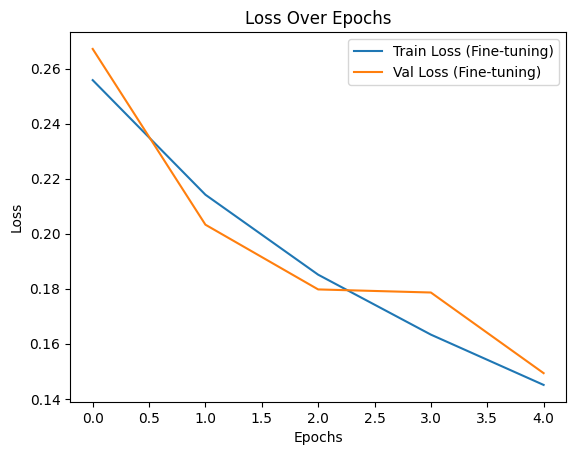

In [31]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_fine_tune.history['accuracy'], label='Train Accuracy (Fine-tuning)')
plt.plot(history_fine_tune.history['val_accuracy'], label='Val Accuracy (Fine-tuning)')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_fine_tune.history['loss'], label='Train Loss (Fine-tuning)')
plt.plot(history_fine_tune.history['val_loss'], label='Val Loss (Fine-tuning)')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [32]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [15]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [16]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [36]:
# Example Usage
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
Predicted Class Name: Apple___Apple_scab


In [37]:
model.save('plant_disease_prediction_model.keras')

In [38]:
model.save('plant_disease_prediction_model.h5')